In [2]:
!pip install datasets --quiet

!pip install evaluate --quiet

!pip install py7zr --quiet

!pip install accelerate -U --quiet

!pip install rouge_score --quiet

import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [3]:
import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'
print(os.environ['TORCH_USE_CUDA_DSA'])

1


In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
from datasets import load_dataset

dataset = load_dataset("stanfordnlp/sst2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

In [7]:
dataset['train']

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 67349
})

In [8]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

In [10]:
def preprocess_function(examples):
   return tokenizer(examples["sentence"], truncation=True)

tokenized_train = dataset['train'].map(preprocess_function, batched=True)
tokenized_val = dataset['validation'].map(preprocess_function, batched=True)

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [11]:
len(set(tokenized_train['label']))

2

In [12]:
len(set(tokenized_val['label']))

2

In [13]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [14]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
   load_precision = load_metric("precision")
   load_recall = load_metric("recall")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   precision = load_precision.compute(predictions=predictions, references=labels)["precision"]
   recall = load_recall.compute(predictions=predictions, references=labels)["recall"]
   return {"accuracy": accuracy, "f1": f1, "Precision":precision, "Recall":recall}


In [22]:
from transformers import TrainerCallback

class LossCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.train_losses.append(logs["loss"])
            if "eval_loss" in logs:
                self.eval_losses.append(logs["eval_loss"])


In [23]:
from transformers import TrainingArguments, Trainer

repo_name = "finetuning-sentiment-model-3000-samples"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
)
loss_callback = LossCallback()

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_val,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
    callbacks=[loss_callback]
)


In [24]:
trainer.train()

Step,Training Loss
500,0.348600
1000,0.271300
1500,0.236700
2000,0.215700
2500,0.206700
3000,0.201100
3500,0.198100
4000,0.187200
4500,0.151300
5000,0.125300


TrainOutput(global_step=8420, training_loss=0.17642632935222707, metrics={'train_runtime': 592.3433, 'train_samples_per_second': 227.399, 'train_steps_per_second': 14.215, 'total_flos': 1226900886258636.0, 'train_loss': 0.17642632935222707, 'epoch': 2.0})

In [25]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric fro

{'eval_loss': 0.38823553919792175,
 'eval_accuracy': 0.8967889908256881,
 'eval_f1': 0.9013157894736843,
 'eval_Precision': 0.8782051282051282,
 'eval_Recall': 0.9256756756756757,
 'eval_runtime': 4.2139,
 'eval_samples_per_second': 206.933,
 'eval_steps_per_second': 13.052,
 'epoch': 2.0}

In [26]:
trainer.save_model()

In [30]:
# Evaluate the model
evaluation_results = trainer.evaluate()

# Access specific metrics
bert_eval_loss = evaluation_results["eval_loss"]
bert_accuracy = evaluation_results["eval_accuracy"]
bert_precision = evaluation_results["eval_Precision"]
bert_recall = evaluation_results["eval_Recall"]
# Print or use the metrics as needed
print(f"Evaluation Loss: {bert_eval_loss}")
print(f"Accuracy: {bert_accuracy}")
print(f"Precision: {bert_precision}")
print(f"Recall: {bert_recall}")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next majo

Evaluation Loss: 0.38823553919792175
Accuracy: 0.8967889908256881
Precision: 0.8782051282051282
Recall: 0.9256756756756757


In [28]:
evaluation_results

{'eval_loss': 0.38823553919792175,
 'eval_accuracy': 0.8967889908256881,
 'eval_f1': 0.9013157894736843,
 'eval_Precision': 0.8782051282051282,
 'eval_Recall': 0.9256756756756757,
 'eval_runtime': 3.1785,
 'eval_samples_per_second': 274.342,
 'eval_steps_per_second': 17.304,
 'epoch': 2.0}

In [32]:
predictions = trainer.predict(tokenized_val)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next majo

In [33]:
y_pred = predictions.predictions.argmax(axis=1)

In [35]:
from transformers import AutoModelForSequenceClassification
model_roberta = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [36]:
trainer_roberta = Trainer(
   model=model_roberta,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_val,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

In [37]:
trainer_roberta.train()

Step,Training Loss
500,0.670200
1000,0.615800
1500,0.552200
2000,0.503100
2500,0.461200
3000,0.427600
3500,0.404800
4000,0.388600
4500,0.350800
5000,0.309800


TrainOutput(global_step=8420, training_loss=0.3891485110031454, metrics={'train_runtime': 1162.3103, 'train_samples_per_second': 115.888, 'train_steps_per_second': 7.244, 'total_flos': 2436932322007218.0, 'train_loss': 0.3891485110031454, 'epoch': 2.0})

In [89]:
# Evaluate the model
evaluation_results_roberta = trainer_roberta.evaluate()

# Access specific metrics
roberta_eval_loss = evaluation_results_roberta["eval_loss"]
roberta_accuracy = evaluation_results_roberta["eval_accuracy"]
roberta_precision = evaluation_results_roberta["eval_Precision"]
roberta_recall = evaluation_results_roberta["eval_Recall"]

# Print or use the metrics as needed
print(f"Evaluation Loss: {roberta_eval_loss}")
print(f"Accuracy: {roberta_accuracy}")
print(f"Precision: {roberta_precision}")
print(f"Recall: {roberta_recall}")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next majo

Evaluation Loss: 0.5716552138328552
Accuracy: 0.8004587155963303
Precision: 0.7922077922077922
Recall: 0.8243243243243243


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the T5 tokenizer and model
tokenizer_t5= T5Tokenizer.from_pretrained('google-t5/t5-small')
model_t5 = T5ForConditionalGeneration.from_pretrained('google-t5/t5-small', num_labels=2)

def preprocess_function(examples):
    return tokenizer_t5(examples["sentence"], padding="max_length", truncation=True)

tokenized_train_t5 = dataset['train'].map(preprocess_function, batched=True)
tokenized_val_t5 = dataset['validation'].map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [ ]:
tokenized_train_t5['input_ids']

In [ ]:
trainer_t5 = Trainer(
   model=model_t5,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_val,
   tokenizer=tokenizer_t5,
   data_collator=DataCollatorWithPadding(tokenizer=tokenizer_t5),
   compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
#trainer_t5.train()

In [ ]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import torch

# Load the SST-2 dataset
#dataset = load_dataset("glue", "sst2")

# Load the GPT-2 tokenizer and model
tokenizer_gpt = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=2)  # Binary classification (positive or negative sentiment)


repo_name = "finetuning-gpt2"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=1,
   per_device_eval_batch_size=1,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
)
loss_callback = LossCallback()

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_val,
   tokenizer=tokenizer_gpt,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
    callbacks=[loss_callback]
)


# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# Print the evaluation results
print(results)

In [ ]:
dataset['train']['sentence'][:3]

['hide new secretions from the parental units ',
 'contains no wit , only labored gags ',
 'that loves its characters and communicates something rather beautiful about human nature ']

In [39]:
naive_bayes_data = dataset

In [40]:
naive_bayes_data

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

In [41]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def text_preprocessing(text):
    text = re.sub(r'<[^>]+>', '', text)
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    processed_text = ' '.join(filtered_words)

    return processed_text

naive_bayes_data_train = [text_preprocessing(sentence) for sentence in naive_bayes_data['train']['sentence']]
naive_bayes_data_train_labels = naive_bayes_data['train']['label']

print(naive_bayes_data_train[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['hide new secretions parental units', 'contains wit , labored gags', 'loves characters communicates something rather beautiful human nature', 'remains utterly satisfied remain throughout', 'worst revenge-of-the-nerds clichés filmmakers could dredge', "'s far tragic merit superficial treatment", 'demonstrates director hollywood blockbusters patriot games still turn small , personal film emotional wallop .', 'saucy', "depressed fifteen-year-old 's suicidal poetry", "deeply thought ` right-thinking ' films"]


In [42]:
import pandas as pd
df = pd.DataFrame()
df['train_sent'] = naive_bayes_data_train
df['train_label'] = naive_bayes_data_train_labels
df_test = naive_bayes_data['validation']['sentence']
df_test_label = naive_bayes_data['validation']['label']

In [43]:
nltk.download('wordnet')
nltk.download('omw-1.4')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df['train_sent'] = df.train_sent.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [44]:
from sklearn.preprocessing import LabelEncoder
reviews = df['train_sent'].values
labels = df['train_label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [45]:
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(reviews)
vocab = vec.get_feature_names_out()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]

In [46]:
def smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [51]:
def grouped_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

def fit(x, y, labels):
    label_priors = {}
    label_items = {}
    n = len(x)
    data = grouped_label(x, y, labels)
    for l, data in data.items():
        n_label_items[l] = len(data)
        label_priors[l] = math.log(label_items[l] / n)
    return n_label_items, label_priors

In [52]:
def predict_label(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    predict_result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_l = smoothing(n_label_items, vocab, word_counts, word, l)
                scores[l] += log_l
        predict_result.append(max(scores, key=label_scores.get))
    return predict_result

In [53]:
import numpy as np
import math
from sklearn.metrics import accuracy_score

labels = [0,1]
n_label_items, log_label_priors = fit(reviews,encoded_labels,labels)
pred = predict_label(n_label_items, vocab, word_counts, log_label_priors, labels, df_test)
print("Accuracy of prediction on test set : ", accuracy_score(df_test_label,pred))
naive_bayes_test_accuracy = accuracy_score(df_test_label,pred)

Accuracy of prediction on test set :  0.7477064220183486


In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(df_test_label,pred, average='binary')
recall = recall_score(df_test_label,pred, average='binary')
f1 = f1_score(df_test_label,pred, average='binary')
print(precision, recall, f1)

0.8163841807909604 0.6509009009009009 0.7243107769423559


# LSTM

In [56]:
!pip install keras

In [ ]:
!pip install tensorflow

In [59]:
import tensorflow as tf
import numpy as np

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from keras.optimizers import Adam
from keras.layers import Input
import keras
# Get the training and testing data
train_data = dataset["train"]
test_data = dataset["validation"]

# Extract sentences and labels
train_sentences = train_data["sentence"]
train_labels = train_data["label"]
test_sentences = test_data["sentence"]
test_labels = test_data["label"]

# Tokenize sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_sentences)

# Convert sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences
max_length = 100  # Choose an appropriate max length
input_dim = 1  # Dimension of each time step in the sequence
max_length = 100  # Maximum sequence length

train_pad = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length)
test_pad = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length)
# Reshape padded sequences to match LSTM input shape
train_pad_reshaped = train_pad.reshape(train_pad.shape[0], max_length, input_dim)
test_pad_reshaped = test_pad.reshape(test_pad.shape[0], max_length, input_dim)

# Convert labels to numpy arrays
train_labels = np.array(train_labels).astype(int)
test_labels = np.array(test_labels).astype(int)

inputs = Input(shape=(train_pad.shape[1],))  # Specify sequence length

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True,  input_shape=(train_pad_reshaped.shape[1], train_pad_reshaped.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50 ))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'mean_squared_error', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [66]:
print(train_pad_reshaped.shape, train_pad.shape[1], train_labels.shape)

(67349, 100, 1) 100 (67349,)


In [83]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_18 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_19 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_19 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [84]:
model.fit(train_pad_reshaped, train_labels, epochs = 20, batch_size = 32)

Epoch 1/20
2105/2105 [==============================] - 58s 23ms/step - loss: 0.2552 - accuracy: 0.5443 - precision: 0.5719 - recall: 0.7277
Epoch 2/20
2105/2105 [==============================] - 35s 16ms/step - loss: 0.2459 - accuracy: 0.5614 - precision: 0.5794 - recall: 0.7802
Epoch 3/20
2105/2105 [==============================] - 35s 16ms/step - loss: 0.2446 - accuracy: 0.5687 - precision: 0.5837 - recall: 0.7909
Epoch 4/20
2105/2105 [==============================] - 34s 16ms/step - loss: 0.2437 - accuracy: 0.5710 - precision: 0.5854 - recall: 0.7914
Epoch 5/20
2105/2105 [==============================] - 35s 17ms/step - loss: 0.2433 - accuracy: 0.5735 - precision: 0.5873 - recall: 0.7914
Epoch 6/20
2105/2105 [==============================] - 36s 17ms/step - loss: 0.2429 - accuracy: 0.5739 - precision: 0.5868 - recall: 0.7978
Epoch 7/20
2105/2105 [==============================] - 35s 17ms/step - loss: 0.2419 - accuracy: 0.5749 - precision: 0.5883 - recall: 0.7923
Epoch 8/20
21

In [85]:
y_pred = model.predict(test_pad_reshaped)

28/28 [==============================] - 2s 10ms/step


In [86]:
from sklearn.metrics import mean_squared_error
lstm_mse = np.sqrt(mean_squared_error(test_labels, y_pred))

In [88]:
scores = model.evaluate(test_pad_reshaped, test_labels)
lstm_accuracy = scores[1]

28/28 [==============================] - 2s 11ms/step - loss: 0.2438 - accuracy: 0.5642 - precision: 0.5537 - recall: 0.7432


In [79]:
lstm_accuracy

0.5756880640983582

In [80]:
print(bert_accuracy, roberta_accuracy, naive_bayes_test_accuracy, lstm_accuracy)

0.8967889908256881 0.8004587155963303 0.7477064220183486 0.5756880640983582


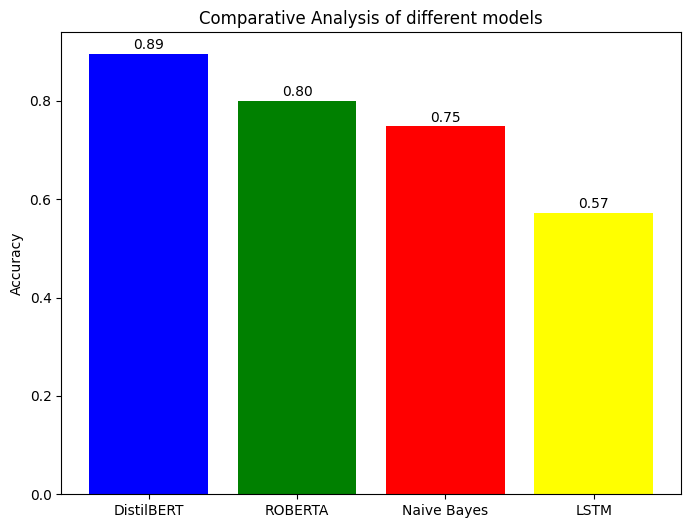

In [ ]:
rmse_scores = [bert_accuracy, roberta_accuracy, naive_bayes_test_accuracy, lstm_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(['DistilBERT', 'ROBERTA', 'Naive Bayes', 'LSTM'], rmse_scores, color=['blue', 'green', 'red', 'yellow'])

for x, y in zip(['DistilBERT', 'ROBERTA', 'Naive Bayes', 'LSTM'], rmse_scores):
    plt.text(x, y + 0.01, f'{y:.2f}', ha='center', color='black')

plt.title('Comparative Analysis of different models')
plt.ylabel('Accuracy')
plt.show()